In [1]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'bitcoin-historical-data:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F1346%2F2109006%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240628%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240628T181435Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3Dc1936cbcee11d6756f286c91d5d671c4f6c3a5b6762a42d183b8c5dd93563acf06e9128ebef60bc5a3c95fe6a3b28489d8710f385b2073edfc542e0ff5484a7187696af521906432ecca0daa3b90f635947f980383450b0ef87867fef179f9f33e3f8b4d89af06f92a2fcfc6698c421184d84be11b4e68fde8659035e8bf8e5262d1a0594b01985df4b07fc971f0305bd41e0d36647cb4735a96ca3deed5bafbd9e9dbe16205e50576e107667337f6be0b055e8ee7151fd038be860e2f2beb3189a0ca9188674d4a7c0b834dc24ab1a8f6570d639b89176ab0a8f16e4e3a10935134048e5bd8f13226a560411b9f1d3e57172cbc2b5f20f5ee74d540ee3bcc3d'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 105242372 bytes downloaded
Downloaded and uncompressed: bitcoin-historical-data
Data source import complete.


![png-transparent-bitcoin-cryptocurrency-exchange-money-bitcoin-investment-payment-gold.png](attachment:1c195216-6aff-49bf-95a0-c9380c7c9a90.png)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split

In [3]:
show_data = pd.read_csv('../input/bitcoin-historical-data/bitstampUSD_1-min_data_2012-01-01_to_2021-03-31.csv')

In [4]:
show_data.shape

(4857377, 8)

In [5]:
show_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4857377 entries, 0 to 4857376
Data columns (total 8 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Timestamp          int64  
 1   Open               float64
 2   High               float64
 3   Low                float64
 4   Close              float64
 5   Volume_(BTC)       float64
 6   Volume_(Currency)  float64
 7   Weighted_Price     float64
dtypes: float64(7), int64(1)
memory usage: 296.5 MB


In [6]:
show_data

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000
1,1325317980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1325318040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1325318100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1325318160,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
4857372,1617148560,58714.31,58714.31,58686.00,58686.00,1.384487,81259.372187,58692.753339
4857373,1617148620,58683.97,58693.43,58683.97,58685.81,7.294848,428158.146640,58693.226508
4857374,1617148680,58693.43,58723.84,58693.43,58723.84,1.705682,100117.070370,58696.198496
4857375,1617148740,58742.18,58770.38,58742.18,58760.59,0.720415,42332.958633,58761.866202


In [7]:
show_data.describe()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
count,4.857377e+06,3.613769e+06,3.613769e+06,3.613769e+06,3.613769e+06,3.613769e+06,3.613769e+06,3.613769e+06
mean,1.471301e+09,6.009024e+03,6.013357e+03,6.004488e+03,6.009014e+03,9.323249e+00,4.176284e+04,6.008935e+03
std,8.428019e+07,8.996247e+03,9.003521e+03,8.988778e+03,8.996360e+03,3.054989e+01,1.518248e+05,8.995992e+03
min,1.325318e+09,3.800000e+00,3.800000e+00,1.500000e+00,1.500000e+00,0.000000e+00,0.000000e+00,3.800000e+00
25%,1.398179e+09,4.438600e+02,4.440000e+02,4.435200e+02,4.438600e+02,4.097759e-01,4.521422e+02,4.438306e+02
50%,1.471428e+09,3.596970e+03,3.598190e+03,3.595620e+03,3.597000e+03,1.979811e+00,3.810124e+03,3.596804e+03
75%,1.544288e+09,8.627270e+03,8.632980e+03,8.621090e+03,8.627160e+03,7.278216e+00,2.569821e+04,8.627637e+03
max,1.617149e+09,6.176356e+04,6.178183e+04,6.167355e+04,6.178180e+04,5.853852e+03,1.390067e+07,6.171621e+04


![istockphoto-937720116-612x612.jpg](attachment:55c3fbd5-06a5-4e3a-a45a-12422e9b0c80.jpg)

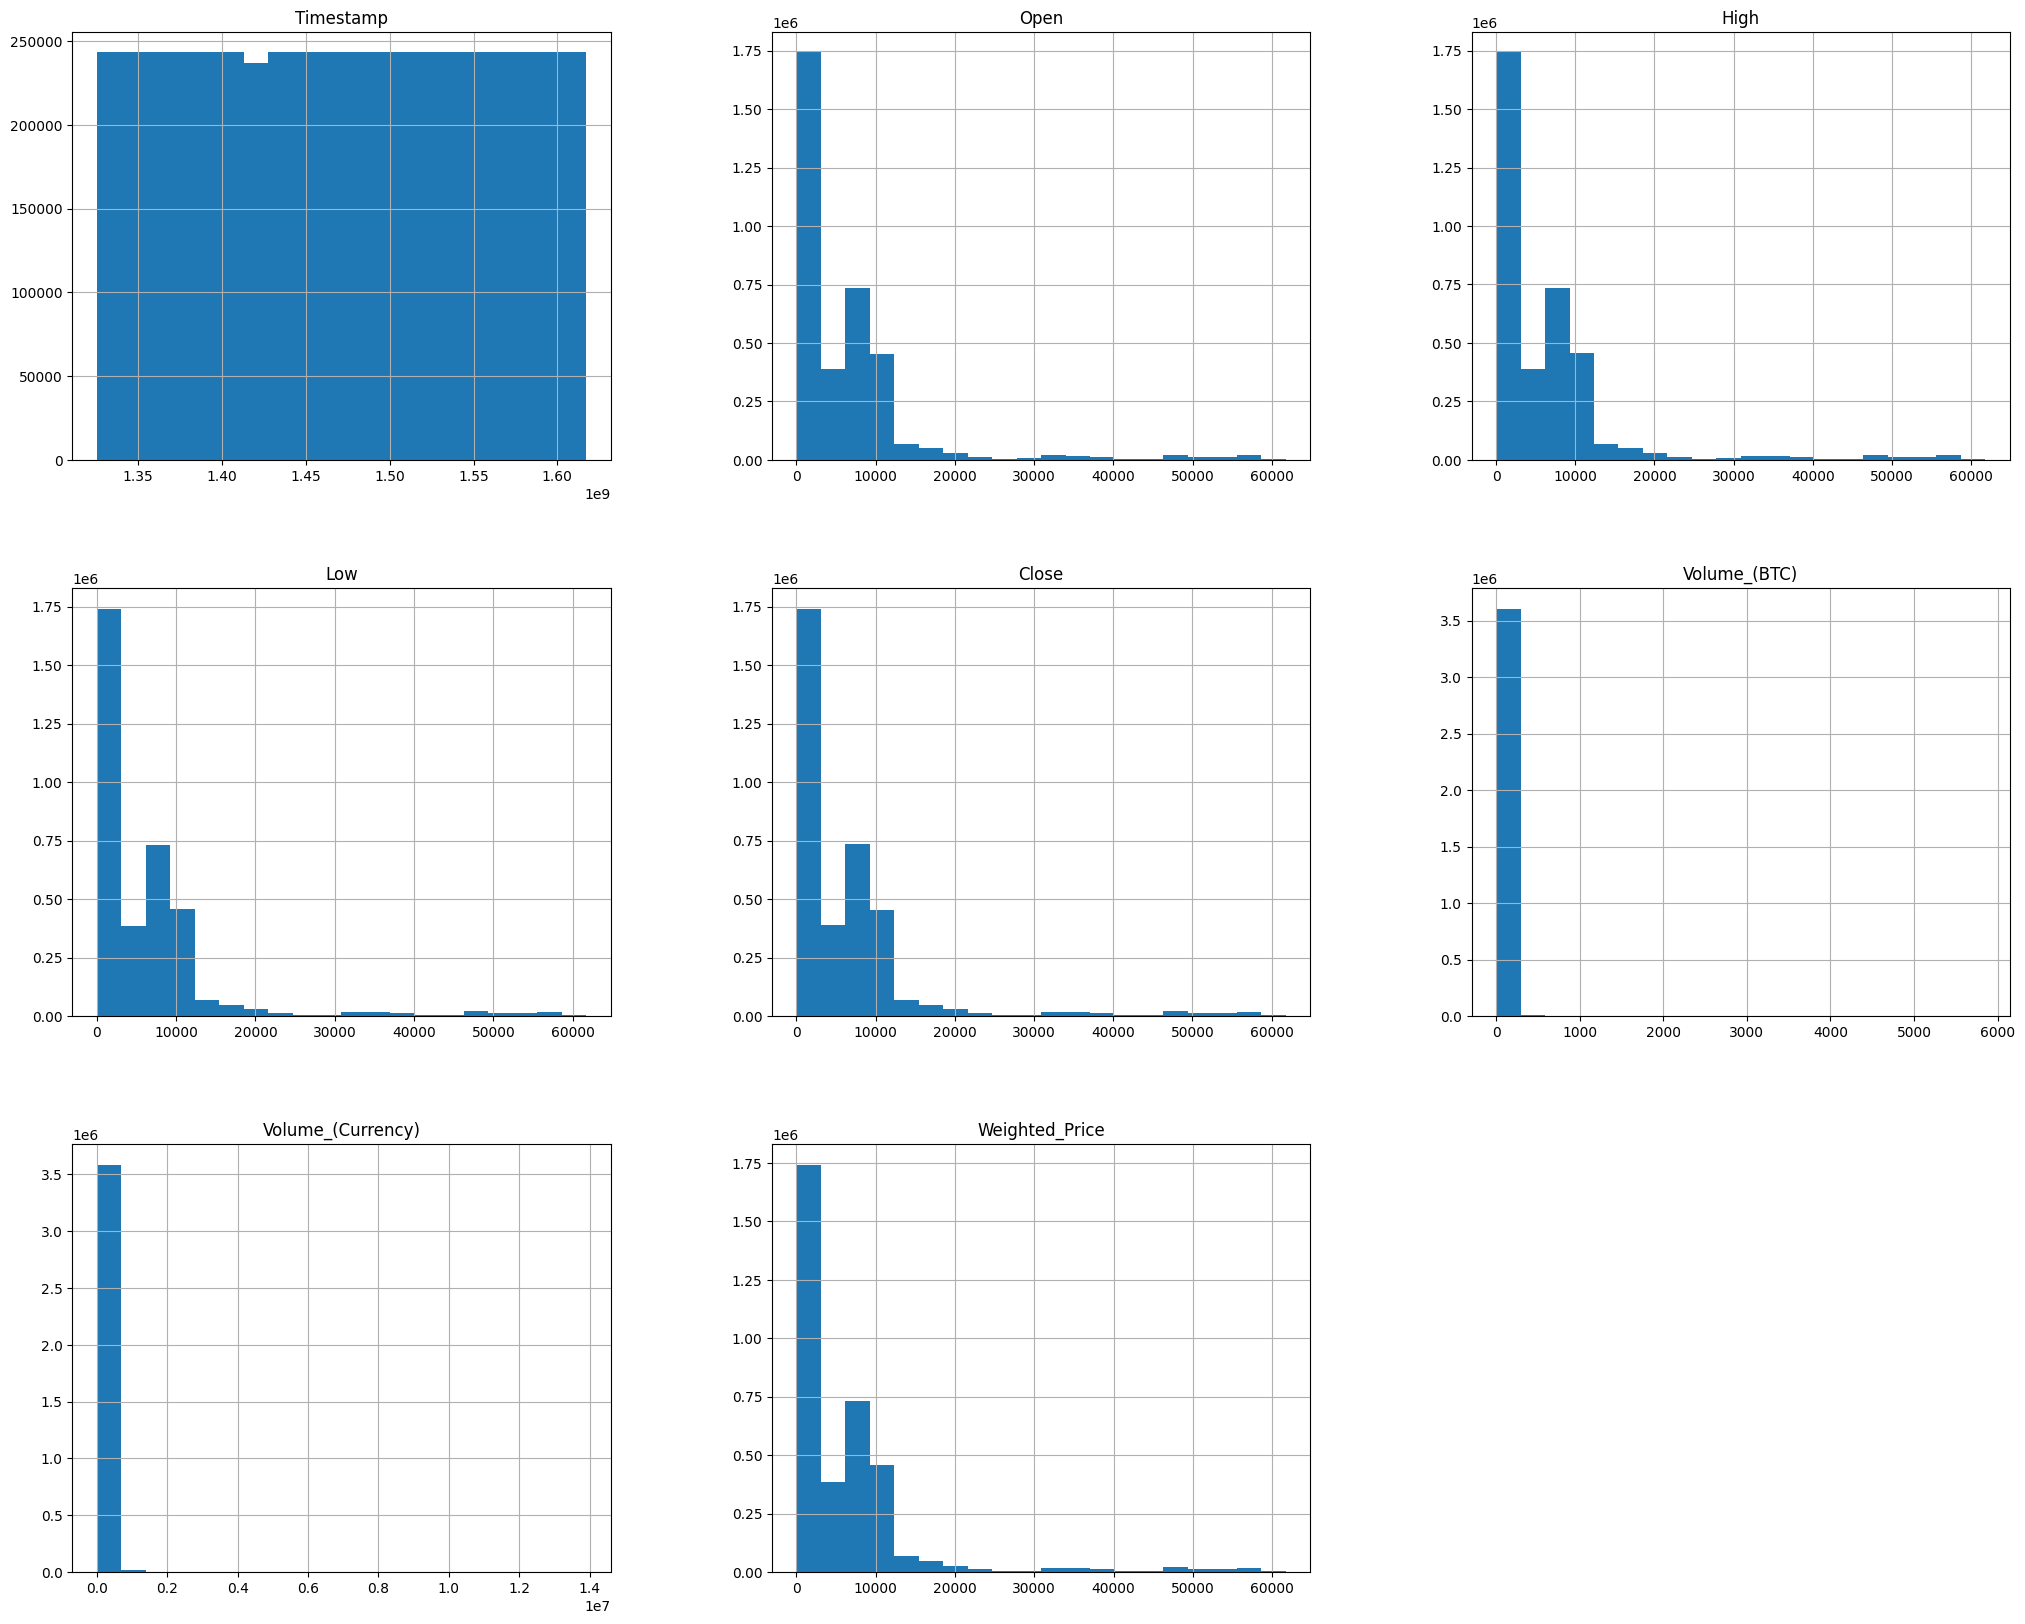

In [8]:
show_data.hist(bins=20, legend=False, figsize=(25, 20))
plt.show()

In [ ]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='Low', y='High', data=show_data)
plt.xlabel("x-axis (Low Price)")
plt.ylabel("y-axis (High Price)")
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='Open', y='Close', data=show_data)
plt.xlabel("x-axis (Open Price)")
plt.ylabel("y-axis (Close Price)")
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='Open', y='Close', data=show_data)
plt.xlabel("x-axis (Open Price)")
plt.ylabel("y-axis (Close Price)")
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='Volume_(BTC)', y='Volume_(Currency)', data=show_data)
plt.xlabel("x-axis (BTC Volume)")
plt.ylabel("y-axis (Currency Volume)")
plt.legend()
plt.show()

In [ ]:
show_data.isnull().value_counts()

In [ ]:
show_data.dtypes.value_counts().plot.pie(autopct=('%0.2f%%'))

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(show_data.isnull())

In [ ]:
all_cols = show_data.select_dtypes(include=('float','int')).columns
float_data = show_data.select_dtypes(include=('float')).columns
float_data

In [ ]:
for z in float_data:
    show_data = show_data.apply(np.ceil)

In [ ]:
#data.shape[0]
null_per = show_data.isnull().sum()/show_data.shape[0]*100
null_per

In [ ]:
show_data['Open'] = int(show_data['Open'].mean())
show_data['High'] = int(show_data['High'].mean())
show_data['Low'] = int(show_data['Low'].mean())
show_data['Close'] = int(show_data['Close'].mean())
show_data['Volume_(BTC)'] = int(show_data['Volume_(BTC)'].mean())
show_data['Volume_(Currency)'] = int(show_data['Volume_(Currency)'].mean())
show_data['Weighted_Price'] = int(show_data['Weighted_Price'].mean())

In [ ]:
show_data

In [ ]:
show_data.dtypes.value_counts().plot.pie(autopct=('%0.2f%%'))

In [ ]:
plt.figure(figsize=(12,9))
sns.heatmap(show_data.isnull())

In [ ]:
x_data = show_data.drop('Weighted_Price', axis='columns')
y_data = show_data['Weighted_Price']

In [ ]:
sns.lineplot(data=x_data)

In [ ]:
plt.figure(figsize=(12,8))
sns.lineplot(data=y_data)

# Will Continue